# Financial Budget Analysis

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Part1: Load data

In [3]:
data = pd.read_csv("datasets/India_budget_2021.csv")
data.head()

,Department /Ministry,Fund allotted(in ₹crores)
0,MINISTRY OF AGRICULTURE,131531.19
1,DEPARTMENT OF ATOMIC ENERGY,18264.89
2,"MINISTRY OF AYURVEDA, YOGA",2970.30
3,MINISTRY OF CHEMICALS AND FERTILISER,80714.94
4,MINISTRY OF CIVIL AVIATION,3224.67


In [10]:
data[data['Fund allotted(in ₹crores)'].isna()]

,Department /Ministry,Fund allotted(in ₹crores)
55,NaN,NaN


### Part2: Preprocessing & EDA

In [13]:
data = data.dropna()

sort data by desending

In [53]:
dataSorted = data.groupby('Department /Ministry', as_index=False)['Fund allotted(in ₹crores)'] \
                .sum().sort_values(by='Fund allotted(in ₹crores)', ascending=False)

select only top 10 budget and groub others in to "OTHERS"

In [67]:
Top10Budget = dataSorted[1:10].append(
    {'Department /Ministry': 'OTHERS', 
     'Fund allotted(in ₹crores)': dataSorted[10:]['Fund allotted(in ₹crores)'].sum()}, ignore_index=True)
Top10Budget

C:\Users\atplu\AppData\Local\Temp\ipykernel_1176\3326836675.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Top10Budget = dataSorted[1:10].append(


,Department /Ministry,Fund allotted(in ₹crores)
0,MINISTRY OF FINANCE,1386273.30
1,MINISTRY OF DEFENCE,478195.62
2,MINISTRY OF CONSUMER AFFAIRS,256948.40
3,MINISTRY OF HOME AFFAIRS,166546.94
4,MINISTRY OF RURAL DEVELOPMENT,133689.50
5,MINISTRY OF AGRICULTURE,131531.19
6,MINISTRY OF ROAD TRANSPORT AND HIGHWAY,118101.00
7,MINISTRY OF RAILWAYS,110054.64
8,MINISTRY OF EDUCATION,93224.31
9,OTHERS,608670.73


Barplot of Top 10 Department by budget

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'MINISTRY OF FINANCE'),
  Text(1, 0, 'MINISTRY OF DEFENCE'),
  Text(2, 0, 'MINISTRY OF CONSUMER AFFAIRS'),
  Text(3, 0, 'MINISTRY OF HOME AFFAIRS'),
  Text(4, 0, 'MINISTRY OF RURAL DEVELOPMENT'),
  Text(5, 0, 'MINISTRY OF AGRICULTURE'),
  Text(6, 0, 'MINISTRY OF ROAD TRANSPORT AND HIGHWAY'),
  Text(7, 0, 'MINISTRY OF RAILWAYS'),
  Text(8, 0, 'MINISTRY OF EDUCATION'),
  Text(9, 0, 'OTHERS')])

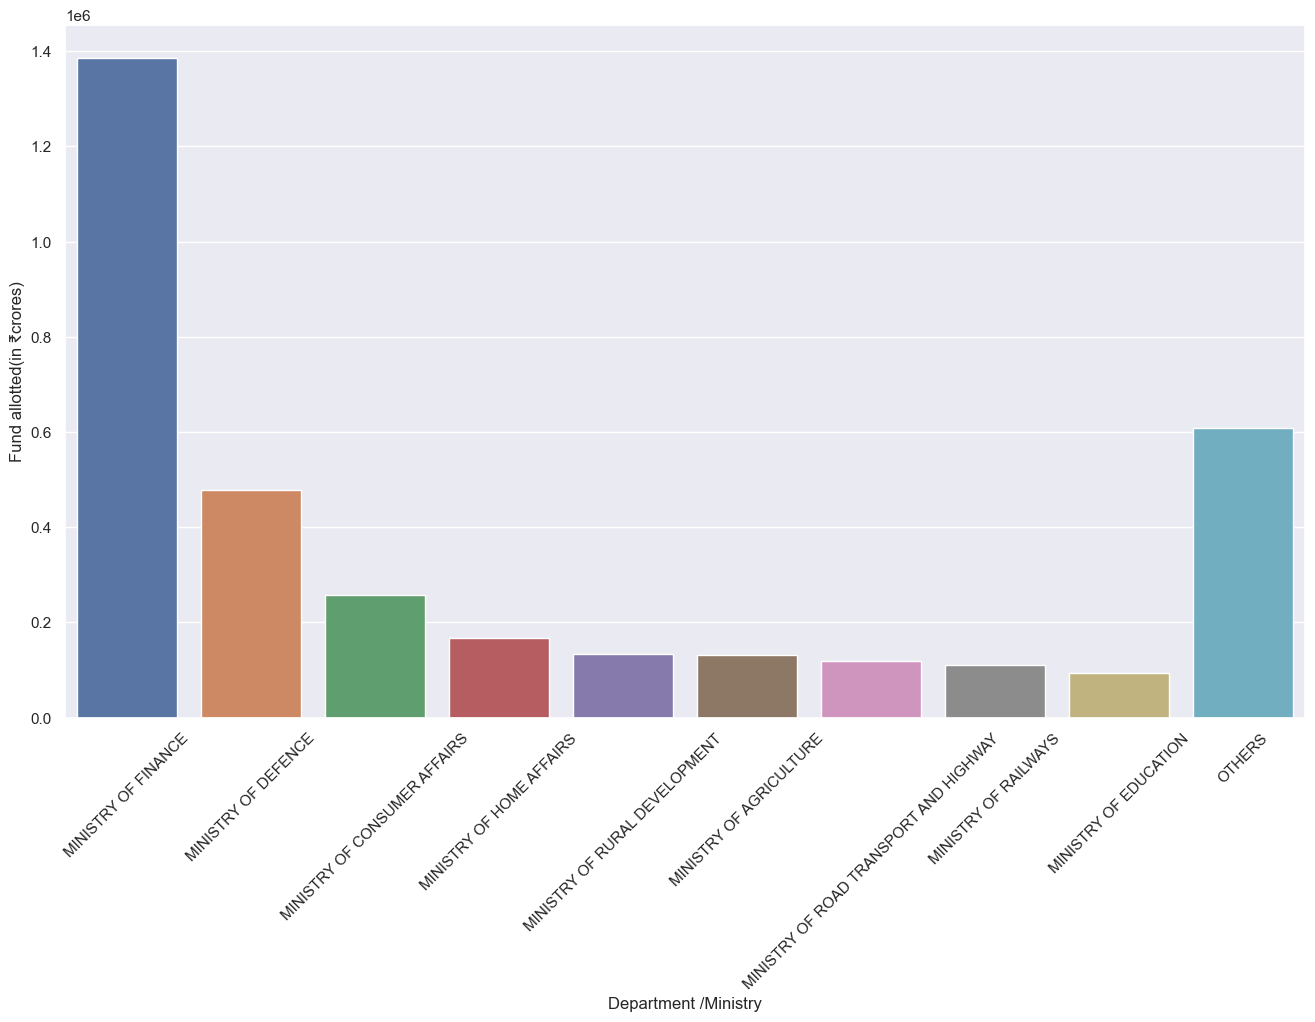

In [68]:
sns.set(rc={'figure.figsize': (16,9)})
sns.barplot(data=Top10Budget, x='Department /Ministry',
                y='Fund allotted(in ₹crores)')
plt.xticks(rotation=45)

Pie chart

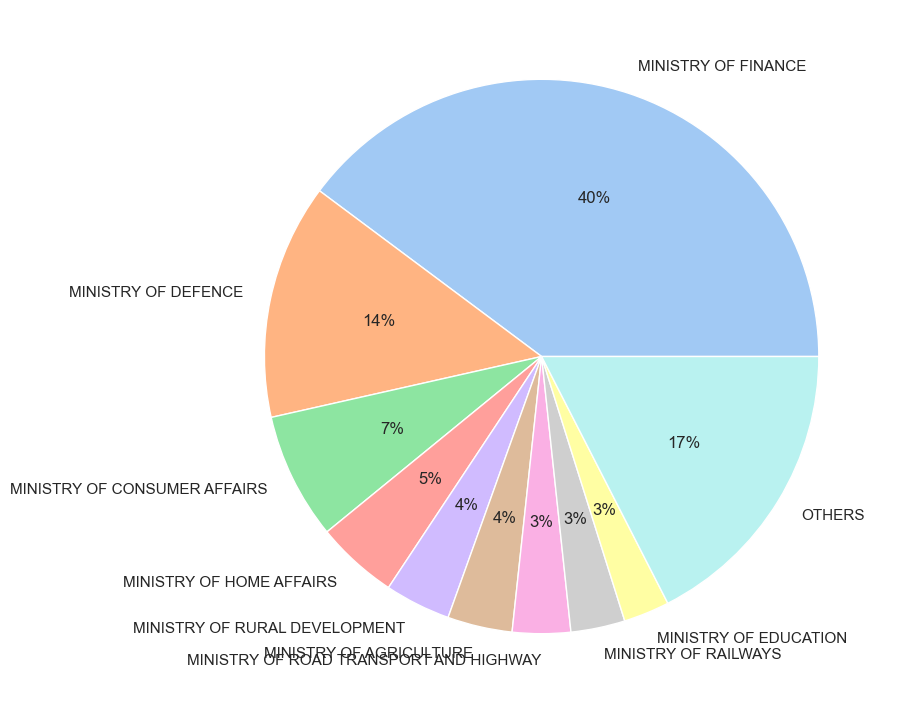

In [69]:
colors = sns.color_palette('pastel')[0:10]
plt.pie(Top10Budget['Fund allotted(in ₹crores)'], 
        labels=Top10Budget['Department /Ministry'],
        colors=colors, autopct='%.0f%%')
plt.show()